Consistency: An estimator is consistent when it is closer to the true parameter when n approaches to infinity.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

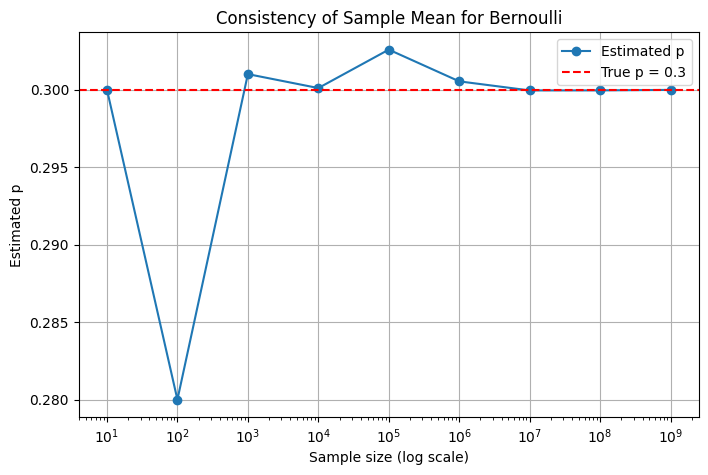

In [3]:
def consistency(p_true = 0.3, sample_sizes = [10, 100,1000,10000,100000,1000000,10000000,100000000,1000000000]):
    estimates = []
    for n in sample_sizes:
        samples = np.random.binomial(1, p_true, size=n)
        p_hat = np.mean(samples)
        estimates.append(p_hat)
    
    plt.figure(figsize=(8,5))
    plt.plot(sample_sizes, estimates, marker='o', label='Estimated p')
    plt.axhline(p_true, color='red', linestyle='--', label=f'True p = {p_true}')
    plt.xscale('log')
    plt.xlabel('Sample size (log scale)')
    plt.ylabel('Estimated p')
    plt.title('Consistency of Sample Mean for Bernoulli')
    plt.legend()
    plt.grid(True)
    plt.show()

consistency()

Maximum Likelihood: It is the parameter value that maximizes L(theta), as well as minimizing Loss function

In [4]:
import numpy as np
import matplotlib.pyplot as plt

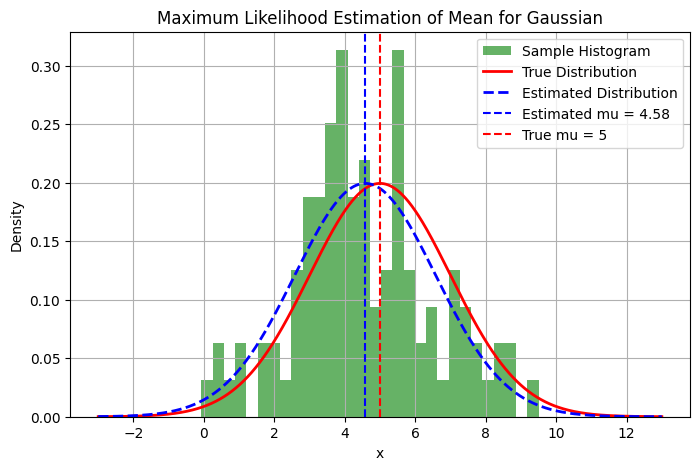

In [6]:
def mle_gaussian_demo(mu_true=5.0, sigma=2.0, n=100):
    samples = np.random.normal(mu_true, sigma, size=n)
    mle_mu = np.mean(samples)  # MLE for mean when sigma known
    
    mu_range = np.linspace(mu_true - 2*sigma, mu_true + 2*sigma, 200)
    log_likelihoods = [
        -0.5 * np.sum(((samples - mu) / sigma)**2) for mu in mu_range ### You have to compute manually
    ]
    
    plt.figure(figsize=(8,5))
    plt.plot(mu_range, log_likelihoods, color='green')
    plt.axvline(mle_mu, color='purple', linestyle='--', label=f'MLE μ = {mle_mu:.2f}')
    plt.xlabel('Mean value')
    plt.ylabel('Log-likelihood')
    plt.title('Log-likelihood for Gaussian Mean')
    plt.legend()
    plt.grid(True)
    plt.show()


MLE()

Now we will explain on minimizing log-likelihood and KL divergence (Same as maximizing log-likelihood)

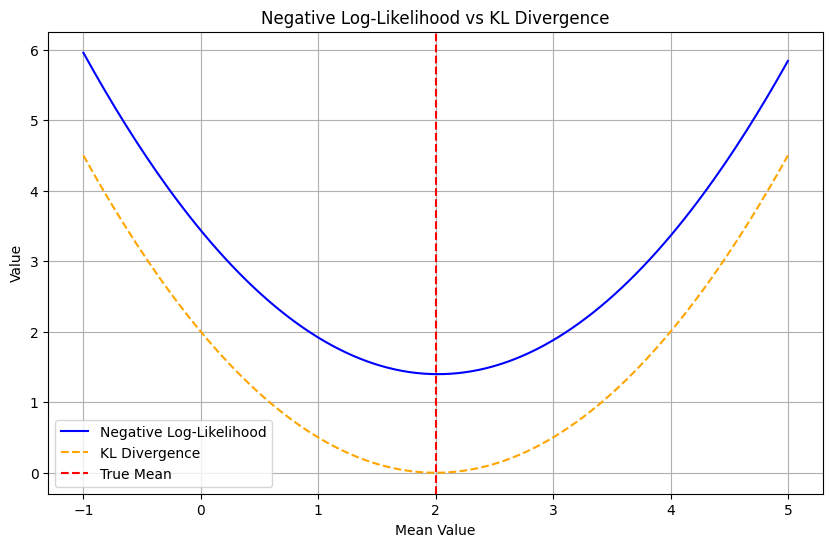

In [ ]:
true_mean = 2.0
true_std = 1.0
np.random.seed(42)
samples = np.random.normal(true_mean, true_std, size=1000)

mu_values = np.linspace(-1,5, 200)

nll_values = []
for mu in mu_values:
    log_probs = -0.5 * np.log(2 * np.pi) - np.log(true_std) - ((samples - mu) ** 2) / (2 * true_std ** 2)
    nll = -np.mean(log_probs)  # negative average log-likelihood
    nll_values.append(nll)

kl_values = []
for mu in mu_values:
    kl = 0.5 * ((true_mean - mu) ** 2) / (true_std ** 2) # KL divergence between N(true_mean, true_std^2) and N(mu, true_std^2)
    kl_values.append(kl)


plt.figure(figsize=(10,6))
plt.plot(mu_values, nll_values, label='Negative Log-Likelihood', color='blue')
plt.plot(mu_values, kl_values, label='KL Divergence', color='orange', linestyle='--')
plt.axvline(true_mean, color='red', linestyle='--', label='True Mean')
plt.xlabel('Mean Value')
plt.ylabel('Value')
plt.title('Negative Log-Likelihood vs KL Divergence')
plt.legend()
plt.grid(True)
plt.show()